In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('Test1.jpg')

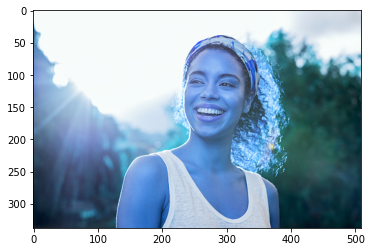

In [3]:
plt.imshow(image) #BGR

In [4]:
image_Org =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

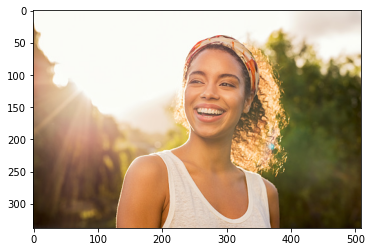

In [5]:
plt.imshow(image_Org)

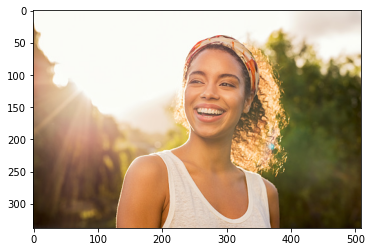

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

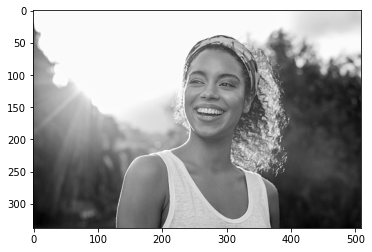

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),cmap='gray')

In [8]:
#!pip install deepface

In [9]:
from deepface import DeepFace

In [10]:
#result = DeepFace.verify("Test_happy.jpg", db_path = "OneDrive/Desktop/CSCE5222/ProjectFE")

In [11]:
predictions = DeepFace.analyze(image_Org)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.30it/s]


In [12]:
predictions

{'emotion': {'angry': 0.00030060009521548636,
  'disgust': 1.1305085756418976e-07,
  'fear': 0.011178084241691977,
  'happy': 99.91620779037476,
  'sad': 0.004709060522145592,
  'surprise': 0.03204180102329701,
  'neutral': 0.035562520497478545},
 'dominant_emotion': 'happy',
 'region': {'x': 220, 'y': 66, 'w': 117, 'h': 117},
 'age': 25,
 'gender': 'Woman',
 'race': {'asian': 46.92439138889313,
  'indian': 9.65401604771614,
  'black': 9.784327447414398,
  'white': 3.106951154768467,
  'middle eastern': 1.481474656611681,
  'latino hispanic': 29.048839211463928},
 'dominant_race': 'asian'}

In [13]:
predictions.keys()

dict_keys(['emotion', 'dominant_emotion', 'region', 'age', 'gender', 'race', 'dominant_race'])

In [14]:
predictions.values()

dict_values([{'angry': 0.00030060009521548636, 'disgust': 1.1305085756418976e-07, 'fear': 0.011178084241691977, 'happy': 99.91620779037476, 'sad': 0.004709060522145592, 'surprise': 0.03204180102329701, 'neutral': 0.035562520497478545}, 'happy', {'x': 220, 'y': 66, 'w': 117, 'h': 117}, 25, 'Woman', {'asian': 46.92439138889313, 'indian': 9.65401604771614, 'black': 9.784327447414398, 'white': 3.106951154768467, 'middle eastern': 1.481474656611681, 'latino hispanic': 29.048839211463928}, 'asian'])

In [15]:
dominant_emotion=predictions['dominant_emotion']

In [16]:
s=predictions.get("dominant_emotion")

In [17]:
print(s)

happy


In [18]:
Emotions_perc = predictions['emotion']

In [19]:
percentage = Emotions_perc['fear']

In [20]:
Emotions_perc[dominant_emotion]

99.91620779037476

In [21]:
# Load the classifier and create a cascade object for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

In [22]:
#detected_faces = face_cascade.detectMultiScale(image)

In [23]:
#!pip install deepface

In [24]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [25]:
faces = face_cascade.detectMultiScale(gray,1.1,4)

In [26]:
for(x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w, y+w),(0,255,0),2)

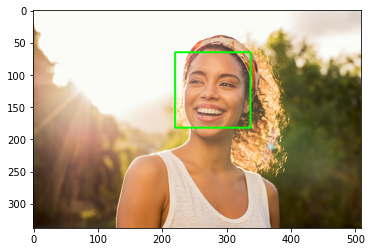

In [27]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [28]:
font = cv2.FONT_HERSHEY_SIMPLEX


In [29]:
cv2.putText(image,predictions['dominant_emotion'] +'='+ str(round(Emotions_perc['happy']))+'%',(0,200),font,1,(0,255,0),2,cv2.LINE_4);

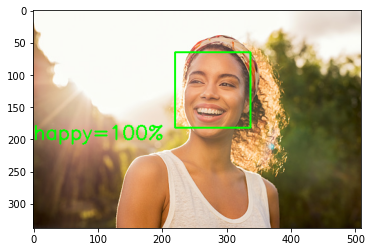

In [30]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [31]:
cv2.putText(image,predictions['dominant_emotion'] ,(100,200),font,1,(255,0,0),2,cv2.LINE_4);

#DEEP FACE EXPERIMENTS

In [32]:
#ref = https://pypi.org/project/deepface/

In [33]:
result = DeepFace.verify("Test1.jpg", "Test2.jpg")

In [34]:
#verifying whether there is a match in two images
result

{'verified': False,
 'distance': 0.6734907073157829,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine'}

In [35]:
#models in deepface
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

In [36]:
result = DeepFace.verify("Test1.jpg", "Test2.jpg", model_name = models[1])

In [37]:
result

{'verified': False,
 'distance': 1.13019278678224,
 'max_threshold_to_verify': 0.4,
 'model': 'Facenet',
 'similarity_metric': 'cosine'}

In [38]:
result = DeepFace.analyze("Test1.jpg",actions = ['emotion','dominant_emotion'])

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.39it/s]


In [39]:
result

{'emotion': {'angry': 2.5502660605525307e-05,
  'disgust': 1.4720172303306356e-08,
  'fear': 0.0030060029530432075,
  'happy': 99.97674822807312,
  'sad': 0.005287384556140751,
  'surprise': 0.0048039590183179826,
  'neutral': 0.010130854207091033},
 'dominant_emotion': 'happy',
 'region': {'x': 217, 'y': 65, 'w': 120, 'h': 120},
 'age': 28,
 'gender': 'Woman',
 'race': {'asian': 53.39159965515137,
  'indian': 9.186326712369919,
  'black': 12.196622788906097,
  'white': 2.3233046755194664,
  'middle eastern': 1.0926094837486744,
  'latino hispanic': 21.80953472852707},
 'dominant_race': 'asian'}

In [40]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']


In [41]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

In [42]:
detected_face = DeepFace.detectFace("Test1.jpg", detector_backend = backends[4])

In [43]:
#face detection and alignment
detected_face = DeepFace.detectFace("Test1.jpg", detector_backend = backends[4])

#face verification
obj = DeepFace.verify("Test1.jpg", "Test2.jpg", detector_backend = backends[4])

#face recognition
#df = DeepFace.find(img_path = "Test1.jpg", db_path = "ProjectFE", detector_backend = backends[4])

#facial analysis
demography = DeepFace.analyze("Test1.jpg", detector_backend = backends[4])

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.62s/it]


In [44]:
#obj

In [45]:
#demography

In [46]:
demography = DeepFace.analyze("Test1.jpg", detector_backend = backends[4])

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.82s/it]


In [47]:
demography

{'emotion': {'angry': 0.0019102216585345437,
  'disgust': 1.3866471109625355e-05,
  'fear': 0.0017425241041547086,
  'happy': 97.88785564231011,
  'sad': 1.3119112550861391,
  'surprise': 0.0006264364320069381,
  'neutral': 0.7959454794791626},
 'dominant_emotion': 'happy',
 'region': {'x': 233, 'y': 64, 'w': 94, 'h': 130},
 'age': 27,
 'gender': 'Woman',
 'race': {'asian': 50.816452503204346,
  'indian': 11.580947041511536,
  'black': 10.29304414987564,
  'white': 3.831532970070839,
  'middle eastern': 1.9569497555494308,
  'latino hispanic': 21.52107059955597},
 'dominant_race': 'asian'}

In [48]:
demography = DeepFace.analyze("Test1.jpg", detector_backend = backends[0])

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.48it/s]


In [49]:
demography

{'emotion': {'angry': 2.5502660605525307e-05,
  'disgust': 1.4720172303306356e-08,
  'fear': 0.0030060029530432075,
  'happy': 99.97674822807312,
  'sad': 0.005287384556140751,
  'surprise': 0.0048039590183179826,
  'neutral': 0.010130854207091033},
 'dominant_emotion': 'happy',
 'region': {'x': 217, 'y': 65, 'w': 120, 'h': 120},
 'age': 28,
 'gender': 'Woman',
 'race': {'asian': 53.39159965515137,
  'indian': 9.186326712369919,
  'black': 12.196622788906097,
  'white': 2.3233046755194664,
  'middle eastern': 1.0926094837486744,
  'latino hispanic': 21.80953472852707},
 'dominant_race': 'asian'}

In [50]:
demography = DeepFace.analyze("Test1.jpg", detector_backend = backends[3])

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.38s/it]


In [51]:
demography

{'emotion': {'angry': 3.3658917431012014e-06,
  'disgust': 1.917883768465245e-08,
  'fear': 0.00017912344674186897,
  'happy': 99.74184036254883,
  'sad': 0.1350629609078169,
  'surprise': 1.1488235429624183e-05,
  'neutral': 0.1229020650498569},
 'dominant_emotion': 'happy',
 'region': {'x': 228, 'y': 62, 'w': 94, 'h': 134},
 'age': 27,
 'gender': 'Woman',
 'race': {'asian': 31.61810259603231,
  'indian': 10.745240212054227,
  'black': 6.019841534514244,
  'white': 11.670877883329643,
  'middle eastern': 7.598354506688773,
  'latino hispanic': 32.347579914619935},
 'dominant_race': 'latino hispanic'}

In [52]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [53]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

***REALTIME VIDEO***

In [2]:
import cv2
from deepface import DeepFace

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)
#check if web cam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open the webcam")
while True:
    ret,frame =cap.read();
    result =DeepFace.analyze(frame, actions = ['emotion'],enforce_detection=False)
    #cv2.putText(image,predictions['dominant_emotion'] +'='+ str(round(Emotions_perc['happy']))+'%',(0,200),font,1,(0,255,0),2,cv2.LINE_4);
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(face_cascade.empty())
    faces = face_cascade.detectMultiScale(gray,1.1,4)
    
    #Draw a rectangle
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    #putText() to insert text on the video
    
        #print(i)
    Emotions_perc = result['emotion']
    cv2.putText(frame,
                result['dominant_emotion']+'='+ str(round(Emotions_perc[result['dominant_emotion']]))+'%',
                (50,50),
                font, 3,
                (0,0,255),
                 2,
                 cv2.LINE_4)
    cv2.imshow('Original Video',frame)
       
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break;
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 